In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from random import sample
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [180]:
#df1=pd.read_csv(r'C:\Users\kacpr\OneDrive - Akademia Górniczo-Hutnicza im. Stanisława Staszica w Krakowie\Licencjat\Dane\otomoto_offers_eng_23-04-2023.csv',delimiter=';')
df1=pd.read_csv(r'C:\Users\user\OneDrive - Akademia Górniczo-Hutnicza im. Stanisława Staszica w Krakowie\Licencjat\Dane\otomoto_offers_eng_23-04-2023.csv',delimiter=';')

C:\Users\user\AppData\Local\Temp\ipykernel_16804\720768799.py:2: DtypeWarning: Columns (200) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(r'C:\Users\user\OneDrive - Akademia Górniczo-Hutnicza im. Stanisława Staszica w Krakowie\Licencjat\Dane\otomoto_offers_eng_23-04-2023.csv',delimiter=';')


# Transformacje

## usunięcie nadmiarowych kolumn

In [181]:
df1.shape

(208205, 224)

Dane oryginalnie posiadają 208 tysięcy rekordów oraz 243 kolumny.

In [182]:
df2=df1.copy()

Teraz zajmę się oczyszczaniem tych kolumn. Najpierw dodam kolumny, które będą mi potrzebne do oczyszczenia danych:

In [183]:
df3= df2.copy()#pd.concat([df2, df1[['no_accident','damaged']]], axis=1)

Te kolumny usuwam, ponieważ są zbędne do naszego modelu. 

In [184]:
df4=df3.drop(['id','vat_margin','offer_from','category','offer_creation_date','financing_possibility','offer_title','show_offers_with_vin_number','location','version', 'color','color_type','generation'],axis=1).copy()

In [185]:
df3=df3.drop(['id','vat_margin','offer_from','category','offer_creation_date','financing_possibility','offer_title','show_offers_with_vin_number','location','version', 'color','color_type','generation'],axis=1).copy()

wyrzucam offer_creation_year bo wszystkie dane są z tego samego miesiaca i offer_from bo to to samo co seller type tylko po polsku. Category to po prostu osobowe, wiec tą kolumne tez usuwam. Id bo bez sensu

In [186]:
X=df3.iloc[:,17:]
df3=df3.drop(df3.iloc[:,17:],axis=1).copy()
X=X.fillna(False)
X=X.replace('Tak',True)
y=df3['price']

C:\Users\user\AppData\Local\Temp\ipykernel_16804\249631266.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=X.fillna(False)
C:\Users\user\AppData\Local\Temp\ipykernel_16804\249631266.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=X.replace('Tak',True)


In [187]:
from sklearn.feature_selection import VarianceThreshold

# Próg dla zmiennych binarnych (np. jeśli większość wartości to samo)
selector = VarianceThreshold(threshold=0.01)  # Usunie kolumny, gdzie mniej niż 1% różnorodności
selector.fit(X)
columns_to_remove = X.columns[~selector.get_support()]
X = selector.transform(X)

In [188]:
df32 = df4.drop(columns=columns_to_remove, axis=1)
X=df32.iloc[:,17:]
X=X.fillna(0)
X = pd.get_dummies(X, drop_first=True)

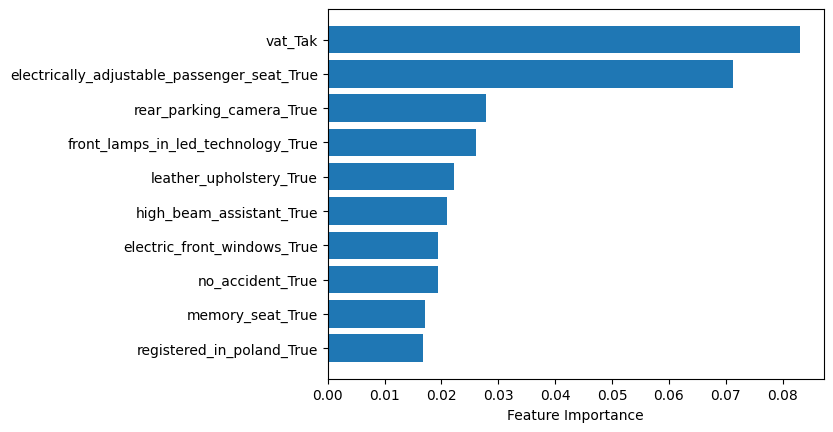

In [189]:
import xgboost as xgb
import matplotlib.pyplot as plt

model = xgb.XGBRegressor()

model.fit(X, y)


xgb_importance = model.feature_importances_

sorted_idx = np.argsort(xgb_importance)[-10:]
plt.barh(X.columns[sorted_idx], xgb_importance[sorted_idx])
plt.xlabel("Feature Importance")

top_5_features = X.columns[sorted_idx][-5:]
plt.show()

Wybieram 5 najistotniejszych kolumn 0-1. Tłumaczenie:
- Vat - jest to opcja wystawienia faktury na samochód. Z racji że przesiębiorcy raczej nie kupują starych samochodów to może to istotnie wpływać na cenę.

## lista wybranych kolumn

In [190]:
variables_to_add = ['leather_upholstery', 'front_lamps_in_led_technology', 'rear_parking_camera', 'electrically_adjustable_passenger_seat', 'vat','no_accident','damaged']
df3 = pd.concat([df3, df2[variables_to_add]], axis=1)
df3['vat']=df3['vat'].fillna('Nie')
df3['electrically_adjustable_passenger_seat']=df3['electrically_adjustable_passenger_seat'].fillna(False)
df3['leather_upholstery']=df3['leather_upholstery'].fillna(False)
df3['front_lamps_in_led_technology']=df3['front_lamps_in_led_technology'].fillna(False)
df3['rear_parking_camera']=df3['rear_parking_camera'].fillna(False)
df3['no_accident']=df3['no_accident'].fillna(False)
df3['damaged']=df3['damaged'].fillna(False)

C:\Users\user\AppData\Local\Temp\ipykernel_16804\1458003047.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['electrically_adjustable_passenger_seat']=df3['electrically_adjustable_passenger_seat'].fillna(False)
C:\Users\user\AppData\Local\Temp\ipykernel_16804\1458003047.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['leather_upholstery']=df3['leather_upholstery'].fillna(False)
C:\Users\user\AppData\Local\Temp\ipykernel_16804\1458003047.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will c

In [191]:
pd.pivot_table(df3, values='production_year', index='state', columns='vat',aggfunc='mean')

vat,Nie,Tak
state,,
New,2022.581221,2022.595772
Used,2011.473561,2017.898356


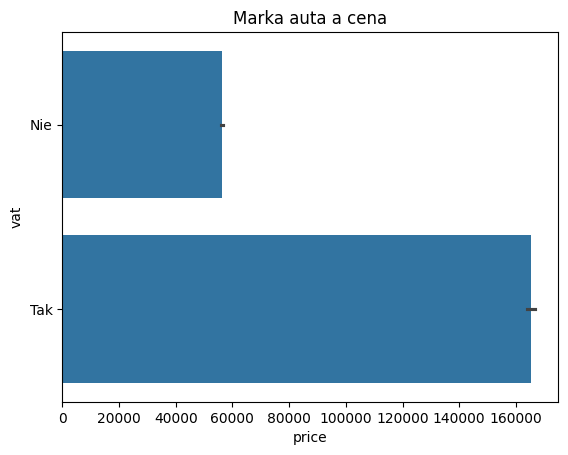

In [192]:
plt.figure()
sns.barplot(x=df3['price'], y=df3['vat'], orient='h')
plt.title('Marka auta a cena')
plt.show()

## Czyszczenie i edycja danych

1. Zmienna 'price' jest w różnych walutach. Zmienię ją na walute PLN

In [193]:
df3['price'] = df3['price'].astype(float)
df3.loc[df3['currency'] == 'EUR', 'price'] *= 4.29
df3=df3.drop('currency',axis=1)

2. Nasze badanie opiera się na samochodach używanych, więc usunę wszystkie nowe samochodu. Cena nowego samochodu może zaburzać nasze modele.

In [194]:
#filt=(df3['state']=='New')
#len(df3[filt])
#df3 = df3.loc[~filt]
#df3=df3.drop('state',axis=1)

20 690 samochodów w naszych danych jest oznaczone jako nowe. Usuwamy je z naszej bazy

3. usuwamy pojazdy oznaczone jako 'damaged'oraz 'no_accident'!='Tak', gdyż cieżko jest przewidywac cenę samochodów uszkodzonych

In [195]:
filt=(df3['no_accident']==True)
df3=df3.loc[filt]

filt=(df3['damaged']=='Tak')
df3=df3.loc[~filt]
#df3=df3.drop('no_accident',axis=1)
#df3=df3.drop('damaged',axis=1)
len(df3)

116576

In [196]:
df3['state'].value_counts()

state
Used    95886
New     20690
Name: count, dtype: int64

po usunięciu zbędnych wiersz zostaje nam 80 tysięcy rekordów

4. Usuwanie miar (moc,pojemnosc silnika,przebieg)

In [197]:
df3['mileage'] = df3['mileage'].str.replace(' km','').str.replace(' ','').astype(float)
df3['engine_displacement'] = df3['engine_displacement'].str.replace(' cm3','').str.replace(' ','').astype(float)
df3['power'] = df3['power'].str.replace(' KM','').str.replace(' ','').astype(float)

5. zmiana kolumny production_year na liczbę wieku samochodu (przyjmuję 2023 jako rok, poniewaz dane są z tego roku)

In [198]:
df3['car_age'] = df3['production_year'].apply(lambda x: 2023 - x)
df3=df3.drop('production_year',axis=1)

6. zmiana kolumny seller_registration_date na seller_experience (przyjmuje 2023)

In [199]:
df3['seller_experience'] = df3['seller_registration_year'].apply(lambda x: 2023 - x)
df3=df3.drop('seller_registration_year',axis=1)

Odrazu też wyczyszczę kolumnę seller_experience ponieważ posiada one błędy - serwis OtoMoto powstał w 2004 roku(czyli 19 lat od 2023), a w danych znajduje sie 30 wartości które mają więcej niż 19 lat. Zamienie te wartości na średnią

In [200]:
filt=df3['seller_experience']>19
df3.loc[filt,'seller_experience']=df3['seller_experience'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_16804\3902503771.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.24230544880593' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[filt,'seller_experience']=df3['seller_experience'].mean()


## Podsumowanie czyszczenia i transformacji danych

1. Pozbyłem się większości kolumn które zawierały informację czy samochód np. ma elektryczne szyby czy nie (TRUE/FALSE)
2. Pozbyłem się potem kolejnych kolumn, które wydawały się zbędnę np. kolor, lokalizacja
3. Zmieniłem wszystkie ceny na jedną walutę
4. Usunąłem z danych pojazdy oznaczone jako nowe
5. Usunąłem pojazdy oznaczone jako 'damaged' albo 'accident'
6. Wyczyściłem zmienne liczbowe z miar 
7. Stworzyłem kolumnę 'car_age'
8. Stworzyłem kolumnę seller_experience

# Sprawdzenie wartości brakujących i odstających

In [201]:
df4=df3.copy()

In [202]:
df4.columns

Index(['price', 'seller_type', 'vehicle_brand', 'vehicle_model', 'mileage',
       'engine_displacement', 'fuel_type', 'power', 'transmission',
       'body_type', 'number_of_doors', 'number_of_seats', 'state',
       'fuel_consumption_in_city', 'leather_upholstery',
       'front_lamps_in_led_technology', 'rear_parking_camera',
       'electrically_adjustable_passenger_seat', 'vat', 'no_accident',
       'damaged', 'car_age', 'seller_experience'],
      dtype='object')

In [203]:
df4.isnull().values.any()

np.True_

### Engine_displacement

In [204]:
df4['engine_displacement'].isnull().sum()

np.int64(2728)

In [205]:
filt=(df4['fuel_type']=='Electric') | (df4['fuel_type']=='Hyrdrogen') 

In [206]:
df4.loc[filt]

,price,seller_type,vehicle_brand,vehicle_model,mileage,engine_displacement,fuel_type,power,transmission,body_type,...,fuel_consumption_in_city,leather_upholstery,front_lamps_in_led_technology,rear_parking_camera,electrically_adjustable_passenger_seat,vat,no_accident,damaged,car_age,seller_experience
370,307100.0,Authorized Dealer,Skoda,Enyaq,10.0,NaN,Electric,204.0,Automatic,SUV,...,NaN,False,True,True,False,Nie,True,False,0,4.0
614,662900.0,Authorized Dealer,Mercedes-Benz,EQS,5.0,NaN,Electric,360.0,Automatic,SUV,...,NaN,True,False,True,True,Tak,True,False,1,13.0
744,46900.0,Dealer,Renault,Zoe,97000.0,NaN,Electric,88.0,Automatic,Compact,...,NaN,False,False,False,False,Nie,True,False,9,4.0
808,230000.0,Authorized Dealer,Skoda,Enyaq,18906.0,NaN,Electric,204.0,Automatic,SUV,...,NaN,False,True,True,False,Tak,True,False,2,6.0
879,389900.0,Authorized Dealer,Jaguar,I-Pace,17950.0,NaN,Electric,400.0,NaN,SUV,...,NaN,False,True,False,True,Tak,True,False,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207889,264900.0,Dealer,Volkswagen,Inny,1.0,NaN,Electric,204.0,Automatic,SUV,...,NaN,False,False,True,False,Tak,True,False,1,3.0
208076,84900.0,Authorized Dealer,Renault,Zoe,36809.0,NaN,Electric,109.0,Automatic,Compact,...,NaN,False,False,True,False,Tak,True,False,5,5.0
208098,390000.0,Authorized Dealer,Mercedes-Benz,EQC,8000.0,NaN,Electric,408.0,Automatic,SUV,...,NaN,False,True,True,True,Tak,True,False,1,15.0
208181,249000.0,Private person,Tesla,Model S,171800.0,NaN,Electric,700.0,Automatic,Sedan,...,NaN,False,False,False,False,Tak,True,False,8,9.0


2636 z 2728 brakujących danych to samochody elektryczne które nie posiadają pojemności silnika, więc zamieniam wartości na 0

In [207]:
df4.loc[filt,'engine_displacement']=0

resztę samochodów które miały braki uzupełniam średnią z kolumny engine displacement

In [208]:
df4['engine_displacement'].isnull().sum()

np.int64(92)

In [209]:
df4['engine_displacement'] = df4['engine_displacement'].fillna(df4['engine_displacement'].mean())

### Number of doors

In [210]:
df4['number_of_doors'].isnull().sum()

np.int64(669)

liczba drzwi zostawiam i z racji ze liczba brakow jest mala to usuwam wiersze z brakami

In [211]:
filt = df4['number_of_doors'].isnull()
df4 = df4.loc[~filt]

### Number of seats

In [212]:
df4['number_of_seats'].isnull().sum()

np.int64(2915)

jest sporo braków więc tą kolumnę usuwam

In [213]:
df4=df4.drop('number_of_seats',axis=1)

### Fuel consumption

In [214]:
df4['fuel_consumption_in_city'].isnull().sum()

np.int64(50706)

niestety tutaj też musze usunąc kolumnę bo ponad połowa to braki

In [215]:
df4=df4.drop('fuel_consumption_in_city',axis=1)

### Drive type

In [216]:
#df4['drive_type'].isnull().sum()

tutaj też usuwam bo bardzo dużo braków

In [217]:
#df4=df4.drop('drive_type',axis=1)

In [218]:
df4.iloc[:,4].isnull().values.any()

np.True_

TRZEBA ZMIENIĆ W AUTACH NEW MILAGE=0, BO NIEKTORE MAJA NAN

In [219]:
pd.pivot_table(df4, values='mileage', index='state',aggfunc='mean')

,mileage
state,
New,126.443484
Used,151379.202728


In [220]:
df4.loc[(df4['mileage'].isnull())]['state'].value_counts()

state
New    1200
Name: count, dtype: int64

In [221]:
df4.loc[df4['mileage'].isnull(), 'mileage'] = 0

**W zestawie danych mamy 1200 braków w kolumnie przebieg, ale występują one tylko w przypadku aut nowych. Zakładam że mają zerowy**

**Power - braki - można by uzupełnić średnią dla każdej marki/modelu**

In [222]:
df4.loc[(df4['power'].isnull())]

,price,seller_type,vehicle_brand,vehicle_model,mileage,engine_displacement,fuel_type,power,transmission,body_type,...,state,leather_upholstery,front_lamps_in_led_technology,rear_parking_camera,electrically_adjustable_passenger_seat,vat,no_accident,damaged,car_age,seller_experience
1702,163900.0,Authorized Dealer,Honda,Civic,5.0,2000.000000,Hybrid,NaN,Automatic,Compact,...,New,True,False,True,False,Tak,True,False,0,8.0
5526,389000.0,Dealer,Ford,Ranger Raptor,18.0,3000.000000,Gasoline,NaN,Automatic,SUV,...,New,False,False,False,False,Tak,True,False,1,4.0
13281,70290.0,Authorized Dealer,Mitsubishi,Space Star,5.0,1193.000000,Gasoline,NaN,Manual,Compact,...,New,False,False,True,False,Tak,True,False,0,8.0
15064,127790.0,Authorized Dealer,Peugeot,308,5.0,1833.413138,Gasoline,NaN,Automatic,Compact,...,New,False,False,False,False,Tak,True,False,1,4.0
18267,136800.0,Dealer,Skoda,Karoq,0.0,1833.413138,Gasoline,NaN,Manual,SUV,...,New,False,True,True,False,Tak,True,False,1,7.0
19966,244390.0,Dealer,Volkswagen,Arteon,0.0,1984.000000,Gasoline,NaN,Manual,Station wagon,...,New,False,False,False,False,Tak,True,False,0,2.0
28926,245900.0,Dealer,Nissan,Ariya,5.0,0.000000,Electric,NaN,Automatic,SUV,...,New,False,False,True,True,Nie,True,False,1,6.0
32523,208400.0,Dealer,Nissan,X-Trail,5.0,1497.000000,Hybrid,NaN,Automatic,SUV,...,New,False,False,True,False,Nie,True,False,1,6.0
41831,163900.0,Authorized Dealer,Honda,Civic,5.0,2000.000000,Hybrid,NaN,Automatic,Compact,...,New,True,False,True,False,Tak,True,False,0,8.0
50660,120900.0,Dealer,Toyota,Corolla,3.0,1833.413138,Gasoline,NaN,Manual,Station wagon,...,New,False,True,True,False,Tak,True,False,1,2.0


In [223]:
new_data = df4.dropna(axis=0, how='any')

In [224]:
((len(df4)-len(new_data))/len(df4))*100

0.11647268931125815

Około 0.11 % danych miało jakieś wartości brakujące. Z uwagi na fakt, że jest to bardzo mała liczba to usuwam całe wiersze z danych

In [225]:
df4=new_data.copy()

### Wartosci odstające

In [226]:
filt=df4['price']>1500000
df4=df4.loc[~filt]

Pozbywam się aut powyżej 1500000 zł z racji że są to wartości odstające

In [227]:
filt=df4['power']>800
df4=df4.loc[~filt]

Usuwam samochody >800 koni

In [228]:
filt=df4['mileage']>1500000
df4=df4.loc[~filt]

Usuwam auta >1500000 km przebiegu

### Wybranie modeli, które mają co najmniej 100 obserwacji

In [229]:
list=df4['vehicle_model'].value_counts()

In [230]:
filtered_models = list[list >= 100].index
df5 = df4[df4['vehicle_model'].isin(filtered_models)]

In [231]:
list[list >= 100].head(10)

vehicle_model
Octavia     2499
Astra       2466
A4          2155
Seria 3     2064
Seria 5     1980
Golf        1976
Focus       1906
Passat      1840
A6          1779
Insignia    1522
Name: count, dtype: int64

In [232]:
list[list >= 100].tail(20)

vehicle_model
Eclipse Cross        110
Leaf                 110
Captiva              109
Elantra              109
C5X                  108
EQS                  108
9.mar                108
C3 Picasso           107
Jogger               106
Jimny                106
V90 Cross Country    104
CX-30                103
Niro                 101
Tiguan Allspace      100
i10                  100
Ranger               100
Cooper S             100
Q2                   100
Altea XL             100
Modus                100
Name: count, dtype: int64

In [233]:
len(df5)

99808

Zmiana na kategoryczne zmienne

In [234]:
df4.columns

Index(['price', 'seller_type', 'vehicle_brand', 'vehicle_model', 'mileage',
       'engine_displacement', 'fuel_type', 'power', 'transmission',
       'body_type', 'number_of_doors', 'state', 'leather_upholstery',
       'front_lamps_in_led_technology', 'rear_parking_camera',
       'electrically_adjustable_passenger_seat', 'vat', 'no_accident',
       'damaged', 'car_age', 'seller_experience'],
      dtype='object')

In [235]:
categorical_columns = ['seller_type', 'fuel_type','vehicle_model','vehicle_brand', 'transmission', 'body_type','number_of_doors','state','leather_upholstery',
       'front_lamps_in_led_technology', 'rear_parking_camera',
       'electrically_adjustable_passenger_seat', 'vat']
numeric_features = ['price','power', 'mileage', 'car_age','engine_displacement','seller_experience']
df5[categorical_columns] = df5[categorical_columns].astype('category')
df5[numeric_features]=df5[numeric_features].astype(np.float32)

C:\Users\user\AppData\Local\Temp\ipykernel_16804\1352548695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5[categorical_columns] = df5[categorical_columns].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_16804\1352548695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5[numeric_features]=df5[numeric_features].astype(np.float32)


## Podsumowanie usuwania braków i wartości odstających

1. Usunięta została kolumna 'engine_displacment' (pojemność silnika) z uwagi na fakt, że samochody elektryczne nie posiadają pojemności.
2. Usunięte zostały wiersze, w których znalazła się jakakolwiek kolumna z brakiem danych. Takich sytuacji było około 500, co stanowi 0.03% danych, które usuwamy
3. Podzieliłem dane na 2 warianty - w jednym na zmienną 'price' nałożyłem logarytm naturalny (co pomogło usunąć skośność rozkładu), a drugi zestaw danych pozostał bez zmian w kolumnie y
4. Następnie metodą IQR (poniżej Q25 kwartla i powyzej Q75 kwartla) zostały usunięte wartości w dwóch zestawach danych. W danych bez logarytmu usunięte zostało 5 tysięcy danych, a w danych z logarytmem 500 danych
5. Następnie wybrałem 15 najliczniejszych producentów (aby nie doszło do sytuacji, gdzie jakiś producent ma 1 auto w zestawie danych). 
6. Zmieniłem typ danych kategorycznych na 'category'

# EDA i korelacje

In [236]:
df5

,price,seller_type,vehicle_brand,vehicle_model,mileage,engine_displacement,fuel_type,power,transmission,body_type,...,state,leather_upholstery,front_lamps_in_led_technology,rear_parking_camera,electrically_adjustable_passenger_seat,vat,no_accident,damaged,car_age,seller_experience
3,16499.0,Dealer,Toyota,Avensis,220000.0,1794.0,Gasoline,129.0,Manual,Station wagon,...,Used,False,False,False,False,Nie,True,False,18.0,12.0
5,80900.0,Dealer,Peugeot,208,1.0,1199.0,Gasoline,75.0,Manual,City cars,...,New,False,False,False,False,Nie,True,False,0.0,4.0
6,74770.0,Authorized Dealer,Kia,Sportage,100420.0,1591.0,Gasoline,132.0,Manual,SUV,...,Used,False,False,False,False,Tak,True,False,5.0,11.0
7,20500.0,Private person,Toyota,Auris,198500.0,1398.0,Gasoline + LPG,97.0,Manual,Compact,...,Used,False,False,False,False,Nie,True,False,15.0,8.0
8,21900.0,Dealer,Citroën,C5,171500.0,1598.0,Gasoline,156.0,Manual,Sedan,...,Used,False,True,False,False,Nie,True,False,13.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208195,139900.0,Authorized Dealer,Kia,Sportage,4604.0,1598.0,Gasoline,150.0,Manual,SUV,...,Used,False,True,True,False,Nie,True,False,1.0,11.0
208199,11900.0,Private person,Honda,Accord,235976.0,2997.0,Gasoline,243.0,Automatic,Sedan,...,Used,True,False,False,True,Nie,True,False,20.0,2.0
208201,39900.0,Private person,Hyundai,I30,190000.0,1582.0,Diesel,110.0,Manual,Station wagon,...,Used,False,False,True,False,Nie,True,False,9.0,7.0
208202,94000.0,Private person,Nissan,Qashqai,33000.0,1332.0,Gasoline,160.0,Manual,SUV,...,Used,False,False,True,False,Nie,True,False,3.0,3.0


array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='power', ylabel='price'>,
        <Axes: xlabel='mileage', ylabel='price'>,
        <Axes: xlabel='car_age', ylabel='price'>,
        <Axes: xlabel='engine_displacement', ylabel='price'>,
        <Axes: xlabel='seller_experience', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='power'>,
        <Axes: xlabel='power', ylabel='power'>,
        <Axes: xlabel='mileage', ylabel='power'>,
        <Axes: xlabel='car_age', ylabel='power'>,
        <Axes: xlabel='engine_displacement', ylabel='power'>,
        <Axes: xlabel='seller_experience', ylabel='power'>],
       [<Axes: xlabel='price', ylabel='mileage'>,
        <Axes: xlabel='power', ylabel='mileage'>,
        <Axes: xlabel='mileage', ylabel='mileage'>,
        <Axes: xlabel='car_age', ylabel='mileage'>,
        <Axes: xlabel='engine_displacement', ylabel='mileage'>,
        <Axes: xlabel='seller_experience', ylabel='mileage'>],
       [<Axes: xlabel='price', 

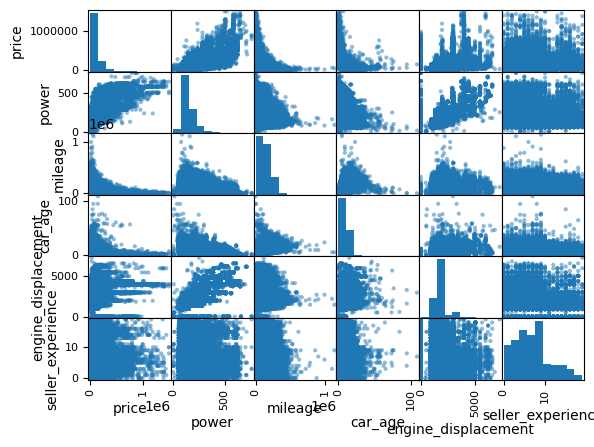

In [237]:
scatter_matrix(df5[numeric_features])

Text(0.5, 1.0, 'Liczność producenta samochodów')

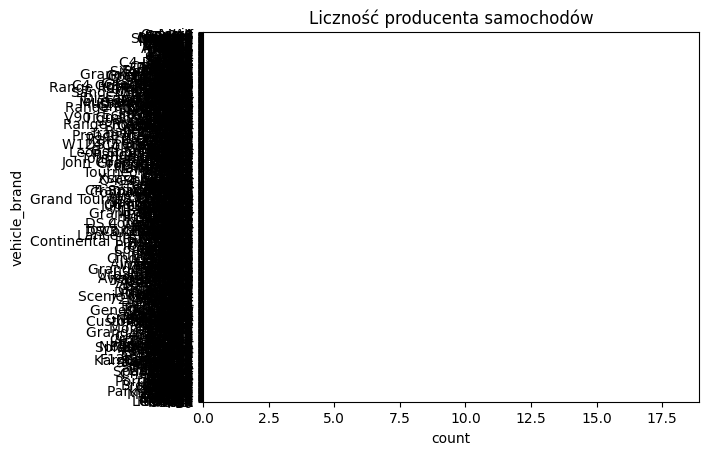

In [238]:
plt.figure()
sns.countplot(y=df5['vehicle_brand'],order=list.index)
plt.title('Liczność producenta samochodów')

## Czy cena zależy od marki auta?

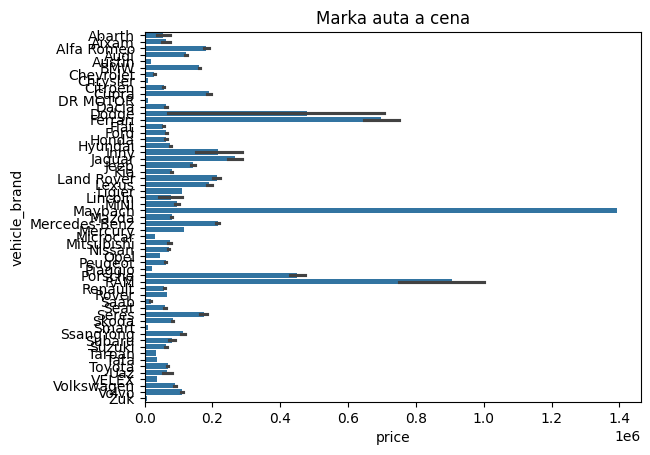

In [239]:
plt.figure()
sns.barplot(x=df5['price'], y=df5['vehicle_brand'], orient='h')
plt.title('Marka auta a cena')
plt.show()

Najdroższymi markami są: Volvo, Audi, BMW i Mercedes-Benz, czyli samochody klasy 'premium'. Najtańsze marki to Opel i Renault.

## Typ paliwa

In [240]:
df5['fuel_type'].value_counts()

fuel_type
Gasoline          48262
Diesel            43611
Hybrid             4330
Gasoline + LPG     2563
Electric           1006
Gasoline + CNG       36
Name: count, dtype: int64

z racji że w danych znajduje się tylko jeden samochód o napędzie wodorowym to pozbędziemy się go 

In [241]:
filt=(df5['fuel_type']=='Gasoline + CNG')
df5=df5.loc[~filt]

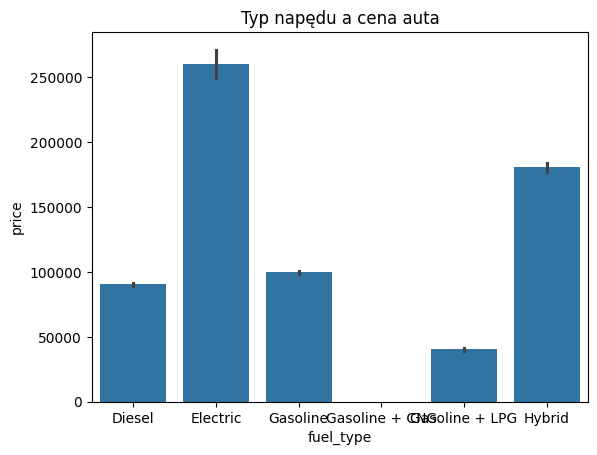

In [242]:
plt.figure()
sns.barplot(x=df5['fuel_type'],y=df5['price'])
plt.title('Typ napędu a cena auta')
plt.show()

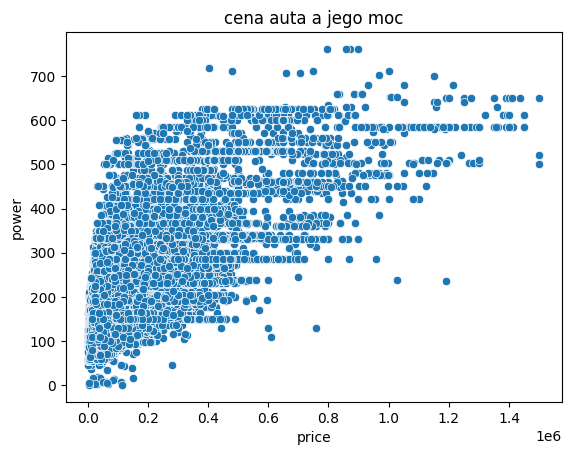

In [243]:
plt.figure()
sns.scatterplot(x=df5['price'],y=df5['power'])
plt.title('cena auta a jego moc')
plt.show()

## Macierze korelacji

Usuwam z macierzy kolumnę vehicle_model, gdyż po analizie korelacji raczej inne cechy są dominujące a model samochodu nie ma wielkiego wpływu na cenę (bardziej marka, dlatego markę zostawiam w badaniu)

Tak prezentuje się macierz korelacji zmiennych. Jeśli chodzi o zmienną price to najsilniejsze korelacje widzimy ze zmiennymi: car_age,milage,power,body_type

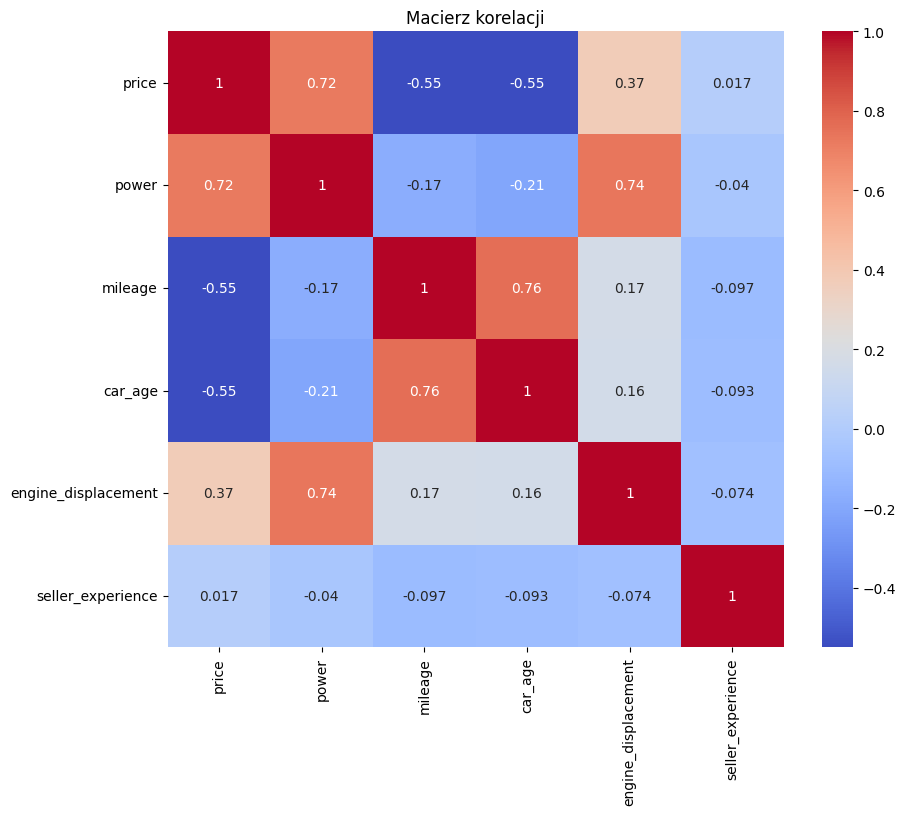

In [244]:
plt.figure(figsize=(10, 8))
sns.heatmap(df5[['price', 'power', 'mileage', 'car_age','engine_displacement','seller_experience']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Macierz korelacji')
plt.show()

In [245]:
df5.to_csv('dane_po_transformacji.csv')

## Podsumowanie rozdziału EDA i korelacje

1. Na początku przedstawiłem kilka wykresów. Będzie ich więcej w późniejszym etapie.
2. Okazało się, że w naszych danych jest tylko jedno auto na wodór, więc je usuwam
3. Przeprowadzona analiza korelacji - usunięcie kolumny model auta, gdyż jest to zbytnie zagłebianie się w szczegóły a korelacje nie są znaczące

# Skalowanie cech numerycznych

In [246]:
df5=df5.drop('vehicle_brand',axis=1)
df4_log=df5.copy()
df4_log['price']=np.log(df4_log['price'])

Z racji, że nasze zmienne są w różnej skali to przeskaluje je poprzez standard scaler (x-u)/s

In [247]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
numeric_features = ['power', 'mileage', 'car_age','engine_displacement','seller_experience']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['seller_type', 'fuel_type','vehicle_model', 'transmission', 'body_type','number_of_doors','state','leather_upholstery',
       'front_lamps_in_led_technology', 'rear_parking_camera',
       'electrically_adjustable_passenger_seat', 'vat']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


y = df5['price']
X = df5.drop('price', axis=1)
X_preprocessed = preprocessor.fit_transform(X)
y_log = df4_log['price']
X_log = df4_log.drop('price', axis=1)
X_log_preprocessed = preprocessor.fit_transform(X_log)

**Podział na testowy i uczący zbiór**

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2,
                                                    random_state=0,shuffle=True)

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log_preprocessed, y_log, test_size=0.2,
                                                    random_state=0,shuffle=True)

# Regresja liniowa

In [249]:
from sklearn.linear_model import LinearRegression
regresja = LinearRegression()
regresja.fit(X_train, y_train)

y_pred_Reg=regresja.predict(X_test)
MAPE_Reg=mean_absolute_percentage_error(y_pred_Reg,y_test)
MAE_Reg=mean_absolute_error(y_pred_Reg,y_test)


#### Logarytm regresja

In [250]:
regresja.fit(X_log_train, y_log_train)
y_pred_Reg_log=regresja.predict(X_log_test)
MAPE_Reg_log=mean_absolute_percentage_error(np.exp(y_pred_Reg_log),np.exp(y_log_test))
MAE_Reg_log=mean_absolute_error(np.exp(y_pred_Reg_log),np.exp(y_log_test))

# Ridge

In [251]:
from sklearn.linear_model import Ridge
param_grid = {
    'alpha': [0.1, 1, 10, 100]  
}


clf = GridSearchCV(estimator=Ridge(), param_grid=param_grid,scoring='neg_mean_absolute_percentage_error', verbose=3, cv=5)
clf.fit(X_train, y_train)
best_params_Ridge = clf.best_params_
alpha1 = best_params_Ridge.get('alpha', None)

ridge=Ridge(alpha=alpha1)
ridge.fit(X_train, y_train)
y_pred_Ridge=ridge.predict(X_test)
MAPE_Ridge=mean_absolute_percentage_error(y_pred_Ridge,y_test)
MAE_Ridge=mean_absolute_error(y_pred_Ridge,y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................alpha=0.1;, score=-0.548 total time=   0.5s
[CV 2/5] END ........................alpha=0.1;, score=-0.562 total time=   0.4s
[CV 3/5] END ........................alpha=0.1;, score=-0.529 total time=   0.3s
[CV 4/5] END ........................alpha=0.1;, score=-0.540 total time=   0.3s
[CV 5/5] END ........................alpha=0.1;, score=-0.574 total time=   0.3s
[CV 1/5] END ..........................alpha=1;, score=-0.548 total time=   0.3s
[CV 2/5] END ..........................alpha=1;, score=-0.563 total time=   0.3s
[CV 3/5] END ..........................alpha=1;, score=-0.530 total time=   0.3s
[CV 4/5] END ..........................alpha=1;, score=-0.540 total time=   0.3s
[CV 5/5] END ..........................alpha=1;, score=-0.574 total time=   0.3s
[CV 1/5] END .........................alpha=10;, score=-0.555 total time=   0.2s
[CV 2/5] END .........................alpha=10;, 

## Ridge logarytm

In [252]:
param_grid = {
    'alpha': [0.001,0.1, 1, 10, 100]  
}

clf = GridSearchCV(estimator=Ridge(), param_grid=param_grid,scoring='neg_mean_absolute_percentage_error', verbose=3, cv=5)
clf.fit(X_log_train, y_log_train)
best_params_Ridge_log = clf.best_params_
alpha1 = best_params_Ridge_log.get('alpha', None)

ridge=Ridge(alpha=alpha1)
ridge.fit(X_log_train, y_log_train)
y_pred_Ridge_log=ridge.predict(X_log_test)
MAPE_Ridge_log=mean_absolute_percentage_error(np.exp(y_pred_Ridge_log),np.exp(y_log_test))
MAE_Ridge_log=mean_absolute_error(np.exp(y_pred_Ridge_log),np.exp(y_log_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ......................alpha=0.001;, score=-0.013 total time=   0.3s
[CV 2/5] END ......................alpha=0.001;, score=-0.013 total time=   0.3s
[CV 3/5] END ......................alpha=0.001;, score=-0.013 total time=   0.3s
[CV 4/5] END ......................alpha=0.001;, score=-0.014 total time=   0.3s
[CV 5/5] END ......................alpha=0.001;, score=-0.013 total time=   0.3s
[CV 1/5] END ........................alpha=0.1;, score=-0.013 total time=   0.3s
[CV 2/5] END ........................alpha=0.1;, score=-0.013 total time=   0.3s
[CV 3/5] END ........................alpha=0.1;, score=-0.013 total time=   0.3s
[CV 4/5] END ........................alpha=0.1;, score=-0.014 total time=   0.3s
[CV 5/5] END ........................alpha=0.1;, score=-0.013 total time=   0.3s
[CV 1/5] END ..........................alpha=1;, score=-0.013 total time=   0.3s
[CV 2/5] END ..........................alpha=1;, 

# Lasy losowe

In [255]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10,25],
    'max_features': [10, 30],
    'min_samples_leaf': [5, 15]
}



clf = GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), param_grid=param_grid, 
                   scoring='neg_mean_absolute_percentage_error', verbose=3, cv=5)

clf.fit(X_train, y_train)

best_params_Forest = clf.best_params_
max_features1 = best_params_Forest.get('max_features', None)
min_samples_split1 = best_params_Forest.get('min_samples_split', None)
min_samples_leaf1 = best_params_Forest.get('min_samples_leaf', None)
n_estimators1 = best_params_Forest.get('n_estimators', None)
Forest=RandomForestRegressor(n_jobs=-1,max_features=max_features1,min_samples_split=min_samples_split1,min_samples_leaf=min_samples_leaf1,n_estimators=n_estimators1)
Forest.fit(X_train, y_train)
y_pred_Las=Forest.predict(X_test)
MAE_las=mean_absolute_error(y_test,y_pred_Las)
MAPE_las=mean_absolute_percentage_error(y_test,y_pred_Las)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.329 total time=   6.1s
[CV 2/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.331 total time=   5.8s
[CV 3/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.332 total time=   5.3s
[CV 4/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.332 total time=   5.5s
[CV 5/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.347 total time=   5.3s
[CV 1/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-0.328 total time=  10.9s
[CV 2/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-0

## Z logarytmem

In [256]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10,25],
    'max_features': [10, 30],
    'min_samples_leaf': [5, 15]
}


clf = GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), param_grid=param_grid, 
                   scoring='neg_mean_absolute_percentage_error', verbose=3, cv=5)

clf.fit(X_log_train, y_log_train)

best_params_Forest_log = clf.best_params_
max_features1 = best_params_Forest_log.get('max_features', None)
min_samples_split1 = best_params_Forest_log.get('min_samples_split', None)
min_samples_leaf1 = best_params_Forest_log.get('min_samples_leaf', None)
n_estimators1 = best_params_Forest_log.get('n_estimators', None)
Forest=RandomForestRegressor(n_jobs=-1,max_features=max_features1,min_samples_split=min_samples_split1,min_samples_leaf=min_samples_leaf1,n_estimators=n_estimators1)
Forest.fit(X_log_train, y_log_train)
y_pred_Las_log=Forest.predict(X_log_test)
MAPE_las_log=mean_absolute_percentage_error(np.exp(y_log_test),np.exp(y_pred_Las_log))
MAE_las_log=mean_absolute_error(np.exp(y_log_test),np.exp(y_pred_Las_log))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.021 total time=   5.9s
[CV 2/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.021 total time=   5.4s
[CV 3/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.020 total time=   5.6s
[CV 4/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.021 total time=   5.5s
[CV 5/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=-0.020 total time=   5.6s
[CV 1/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-0.020 total time=  11.0s
[CV 2/5] END max_depth=None, max_features=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=-0

# MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
param_grid = {
    'hidden_layer_sizes': [(64, 64),(64, 64,64),],
    'activation': ["tanh", "relu"],
    'learning_rate': ["constant", "adaptive"],
    'batch_size': ["auto"],
}


clf = GridSearchCV(estimator=MLPRegressor(), param_grid=param_grid, 
                   scoring='neg_mean_absolute_percentage_error', verbose=3, cv=5)

clf.fit(X_train, y_train)

best_params_MLP = clf.best_params_
hidden_layer_sizes1 = best_params_MLP.get('hidden_layer_sizes', None)
activation1 = best_params_MLP.get('activation', None)
learning_rate1 = best_params_MLP.get('learning_rate', None)
batch_size1 = best_params_MLP.get('batch_size', None)
Network=MLPRegressor(hidden_layer_sizes=hidden_layer_sizes1,activation=activation1,learning_rate=learning_rate1,batch_size=batch_size1)
Network.fit(X_train, y_train)
y_pred_MLP=Network.predict(X_test)
MAE_MLP=mean_absolute_error(y_test,y_pred_MLP)
MAPE_MLP=mean_absolute_percentage_error(y_test,y_pred_MLP)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


### z logarytmem

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(64, 64),(64, 64,64),],
    'activation': ["tanh", "relu"],
    'learning_rate': ["constant", "adaptive"],
    'batch_size': ["auto"],
}



clf = GridSearchCV(estimator=MLPRegressor(), param_grid=param_grid, 
                   scoring='neg_mean_absolute_percentage_error', verbose=3, cv=5)

clf.fit(X_log_train, y_log_train)

best_params_MLP_log = clf.best_params_
hidden_layer_sizes1 = best_params_MLP_log.get('hidden_layer_sizes', None)
activation1 = best_params_MLP_log.get('activation', None)
learning_rate1 = best_params_MLP_log.get('learning_rate', None)
batch_size1 = best_params_MLP_log.get('batch_size', None)
Network=MLPRegressor(hidden_layer_sizes=hidden_layer_sizes1,activation=activation1,learning_rate=learning_rate1,batch_size=batch_size1)
Network.fit(X_log_train, y_log_train)
y_pred_MLP_log=Network.predict(X_log_test)
MAE_MLP_log=mean_absolute_error(np.exp(y_log_test),np.exp(y_pred_MLP_log))
MAPE_MLP_log=mean_absolute_percentage_error(np.exp(y_log_test),np.exp(y_pred_MLP_log))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END activation=relu, batch_size=auto, hidden_layer_sizes=64, learning_rate=constant;, score=-0.010 total time=  38.4s
[CV 2/5] END activation=relu, batch_size=auto, hidden_layer_sizes=64, learning_rate=constant;, score=-0.010 total time=  34.0s
[CV 3/5] END activation=relu, batch_size=auto, hidden_layer_sizes=64, learning_rate=constant;, score=-0.010 total time=  43.4s
[CV 4/5] END activation=relu, batch_size=auto, hidden_layer_sizes=64, learning_rate=constant;, score=-0.010 total time=  32.1s
[CV 5/5] END activation=relu, batch_size=auto, hidden_layer_sizes=64, learning_rate=constant;, score=-0.011 total time=  33.2s


# XGBOOST

In [ ]:
import xgboost as xgb
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.001,0.01, 0.1, 0.2],  
    'max_depth': [1, 2, 3]  
}



clf = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, 
                   scoring='neg_mean_absolute_percentage_error', verbose=3, cv=5)

clf.fit(X_train, y_train)

best_params_XGB = clf.best_params_
n_estimators1 = best_params_XGB.get('n_estimators', None)
learning_rate1 = best_params_XGB.get('learning_rate', None)
max_depth1 = best_params_XGB.get('max_depth', None)
xgb_model=xgb.XGBRegressor(objective='reg:linear',n_estimators=n_estimators1,learning_rate=learning_rate1,max_depth=max_depth1)
xgb_model.fit(X_train, y_train)
y_pred_XGB=xgb_model.predict(X_test)
MAE_XGB=mean_absolute_error(y_test,y_pred_XGB)
MAPE_XGB=mean_absolute_percentage_error(y_test,y_pred_XGB)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-1.633 total time=   0.3s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-1.676 total time=   0.3s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-1.601 total time=   0.3s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-1.648 total time=   0.3s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-1.729 total time=   0.3s


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


### Z logarytmem

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.001,0.01, 0.1, 0.2,0.3],  
    'max_depth': [2, 3,6,9]  
}


clf = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'), param_grid=param_grid, 
                   scoring='neg_mean_absolute_percentage_error', verbose=3, cv=5)

clf.fit(X_log_train, y_log_train)

best_params_XGB_log = clf.best_params_
n_estimators1 = best_params_XGB_log.get('n_estimators', None)
learning_rate1 = best_params_XGB_log.get('learning_rate', None)
max_depth1 = best_params_XGB_log.get('max_depth', None)
xgb_model=xgb.XGBRegressor(objective='reg:linear',n_estimators=n_estimators1,learning_rate=learning_rate1,max_depth=max_depth1)
xgb_model.fit(X_log_train, y_log_train)
y_pred_XGB_log=xgb_model.predict(X_log_test)
MAPE_XGB_log=mean_absolute_percentage_error(np.exp(y_log_test),np.exp(y_pred_XGB_log))
MAE_XGB_log=mean_absolute_error(np.exp(y_log_test),np.exp(y_pred_XGB_log))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-0.068 total time=   0.3s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-0.069 total time=   0.3s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-0.068 total time=   0.3s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-0.069 total time=   0.3s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=50;, score=-0.069 total time=   0.3s


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


# Tabela wyników

In [ ]:
import pandas as pd

comparison_table = pd.DataFrame({
    'Actual': np.exp(y_log_test),
    'MLPLog': np.exp(y_pred_MLP_log),
    'MLP':y_pred_MLP,
    'LogLinear':np.exp(y_pred_Reg_log),
    'RidgeLog':np.exp(y_pred_Ridge_log),
    'laslosLog':np.exp(y_pred_Las_log),
    'xgboostLog':np.exp(y_pred_XGB_log),
    'Linear':y_pred_Reg,
    'Ridge':y_pred_Ridge,
    'laslos':y_pred_Las,
    'xgboost':y_pred_XGB,
})


comparison_table.tail(20)

,Actual,MLPLog,MLP,LogLinear,RidgeLog,laslosLog,xgboostLog
13529,209000.015625,179880.571694,181535.608727,173069.724737,172751.962348,142361.245798,66392.546875
10311,69999.031250,70467.572952,60414.306110,67745.386836,67476.756254,62390.376660,63366.113281
106350,10999.005859,8814.307468,12079.024658,11221.214551,11227.535583,19634.471866,59340.761719
36583,171700.000000,147774.034801,132273.174864,142629.102051,141868.927933,149311.125890,65374.640625
54649,201899.953125,192660.598176,176178.283633,170338.122175,170470.553455,142893.554242,65374.640625
43367,51799.996094,48626.124966,43316.733990,40380.692864,40232.204709,38182.716624,61367.011719
123269,99000.015625,98431.702225,121575.074393,102793.509260,103190.363868,66683.440558,65118.648438
53415,31900.001953,29567.758431,32162.869020,29228.555783,29365.971413,32545.431917,62687.683594
154151,195100.031250,181342.246623,169113.984423,158915.886509,158647.161156,131819.874558,65374.640625
161132,56600.023438,54740.388876,68113.696053,59752.897799,59768.960191,50056.655089,64682.480469


In [ ]:
errors_table = pd.DataFrame({
    'MLPLog': {'MAPE':MAPE_MLP_log,'MAE':MAE_MLP_log},
    'MLP':{'MAPE':MAPE_MLP,'MAE':MAE_MLP},
    'LogLinear':{'MAPE':MAPE_Reg_log,'MAE':MAE_Reg_log},
    'Linear':{'MAPE':MAPE_Reg,'MAE':MAE_Reg},
    'RidgeLog':{'MAPE':MAPE_Ridge_log,'MAE':MAE_Ridge_log},
    'Ridge':{'MAPE':MAPE_Ridge,'MAE':MAE_Ridge},
    'laslosLog':{'MAPE':MAPE_las_log,'MAE':MAE_las_log},
    'laslos':{'MAPE':MAPE_las,'MAE':MAE_las},
    'xgboostLog':{'MAPE':MAPE_XGB_log,'MAE':MAE_XGB_log},
    'xgboost':{'MAPE':MAPE_XGB,'MAE':MAE_XGB}
})

errors_table

,MLPLog,MLP,LogLinear,Linear,RidgeLog,Ridge,laslosLog,laslos,xgboostLog,xgboost
MAPE,0.115612,0.189390,0.221277,1.471525,0.222070,1.631730,0.318333,0.475583,0.991433,1.677245
MAE,10628.473568,16060.957777,13676.684510,25569.375658,13646.667942,25571.932275,28375.087337,27166.848986,63719.996094,69656.875000


In [ ]:
best_params_Forest,best_params_Forest_log,best_params_MLP,best_params_MLP_log,best_params_XGB,best_params_XGB_log
best_params_Ridge,best_params_Ridge_log,best_params_MLP,best_params_MLP_log,best_params_XGB,best_params_XGB_log,best_params_Forest,best_params_Forest_log

({'alpha': 0.1},
 {'alpha': 1},
 {'activation': 'relu',
  'batch_size': 'auto',
  'hidden_layer_sizes': 64,
  'learning_rate': 'constant'},
 {'activation': 'relu',
  'batch_size': 'auto',
  'hidden_layer_sizes': 64,
  'learning_rate': 'constant'},
 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50},
 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50},
 {'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 50},
 {'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 50})